In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import json

## pandas 

In [145]:
columns_i_want = ['Model', 'Year',  'Encoder', 'Task']

In [146]:
df = df[columns_i_want]

In [147]:
df

,Model,Year,Encoder,Task
0,ERNIE,2019,Transformer,CoLA
1,T5,2019,Transformer,CoLA
2,RoBERTa,2019,Transformer,CoLA
3,BERT,2018,Transformer,CoLA
4,BiLSTM+ELMo,2018,LSTM,CoLA
...,...,...,...,...
59,BERT,2018,Transformer,RTE
60,BiLSTM+ELMo,2018,LSTM,RTE
61,BiLSTM+CoVe,2017,LSTM,RTE
62,BiLSTM+Attn,2017,LSTM,RTE


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [105]:
penguins_df['sex'].value_counts(normalize = True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

In [40]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [63]:
# get rid of the missing values in bill_depth, 
#penguins_df.dropna(subset = ['bill_depth_mm'],inplace = True)
# get rid of row 3 
penguins_df.drop(4)
# convert body mass in grams to body mass in kilo grams   conversion ~ 0.001 

penguins_df['body_mass_g'] = (penguins_df['body_mass_g']) * .001
# rename the body mass column 

penguins_df.rename(columns = {'body_mass_g':'body_mass_kg'})







# look at the distribution of bill length 
#penguins_df.bill_length_mm.plot(kind = 'hist')
penguins_df.describe()

#sns.histplot(x ='bill_length_mm',hue = 'island', data = penguins_df)

# look at the differences in the distribution of bill length between islands 
# calculate the mean of bill lenth 
mean_bill_length = penguins_df['bill_length_mm'].mean()

# create a new column called big billed if the penguin has a bill greater than the mean small if under mean, large > mean 
penguins_df['big_bill'] = penguins_df['bill_length_mm'].map(lambda x: 'big' if x > mean_bill_length else 'small') 





In [92]:
df =sns.load_dataset('glue')

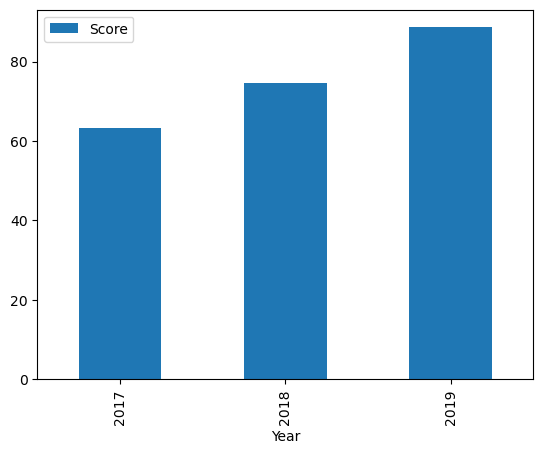

In [70]:
df.groupby('Year').mean().plot(kind ='bar')

grouped_year_df = df.groupby('Year').mean()

In [78]:
grouped_year_df= grouped_year_df.reset_index()

<AxesSubplot:xlabel='Year', ylabel='Score'>

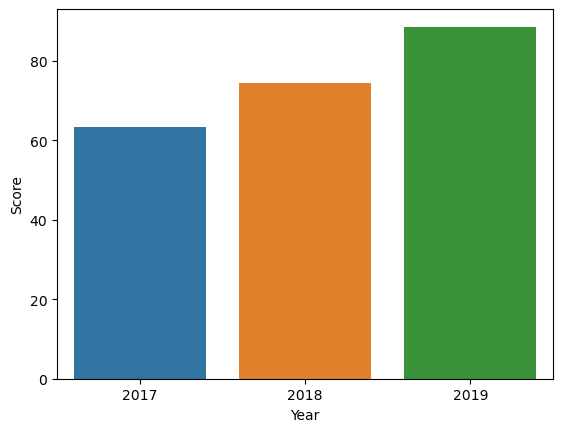

In [79]:
sns.barplot(x ='Year', y = 'Score', data =grouped_year_df)

In [91]:
df

,Model,Year,Task
0,ERNIE,2019,CoLA
1,T5,2019,CoLA
2,RoBERTa,2019,CoLA
3,BERT,2018,CoLA
4,BiLSTM+ELMo,2018,CoLA
...,...,...,...
59,BERT,2018,RTE
60,BiLSTM+ELMo,2018,RTE
61,BiLSTM+CoVe,2017,RTE
62,BiLSTM+Attn,2017,RTE


In [109]:
# plot a bar graph with matplotlib and seaborn of the average score per year 

# add titles and axis 

# find the model with the lowest score
lowest_score = df.sort_values(by = 'Score')
# find the most occuring model in the data set 
df.groupby('Model')['Model'].count()

Model
BERT           8
BiLSTM         8
BiLSTM+Attn    8
BiLSTM+CoVe    8
BiLSTM+ELMo    8
ERNIE          8
RoBERTa        8
T5             8
Name: Model, dtype: int64

In [95]:
lowest_score.head(1)

,Model,Year,Encoder,Task,Score
7,BiLSTM,2017,LSTM,CoLA,11.6


In [111]:
iris= sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [114]:
# find the virginica flower with the largest sepal width 
iris.loc[iris['species']=='virginica'].sort_values(by = 'sepal_width', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [118]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [128]:
iris[iris['species'] == 'virginica'].sort_values(by = 'sepal_width', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [130]:
cars_dict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

# convert the keys in this dictionary to a list

In [137]:
info= list(cars_dict.keys())

In [138]:
car = list(cars_dict.values())

In [140]:
list(zip(info,car))

[('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)]

## JSONS 

In [150]:



data =[ 
   { 
      "id":1,
      "name":"happy cridmas",
      "color":[ 
         "red",
         "green"
      ]
   },
   { 
      "id":2,
      "name":"merry chrystler",
      "color":[ 
         "pink",
         "yellow"
      ]
   }
]

In [ ]:
for d in data:
    d['color'] = [val if val not in ['green','yellow'] else 'red' for val in d['color']]
print(data)

In [167]:
for dic in data[1:]:
    for i range(len(dic['color'])):
        i = 'green'
       

In [168]:
data

[{'id': 1, 'name': 'cridmas', 'color': ['blue', 'blue']},
 {'id': 2, 'name': 'Rocco', 'color': 'green'}]

In [154]:


for dic in data: 
    dic['color'][1] = 'red'
    
    

In [155]:
data

[{'id': 1, 'name': 'cridmas', 'color': ['red', 'red']},
 {'id': 2, 'name': 'Rocco', 'color': ['pink', 'red']}]

In [153]:
value_list

[1, 'cridmas', ['red', 'green'], 2, 'Rocco', ['pink', 'yellow']]

In [151]:
i = 0 
values_list = []
for value in data:
    values_list.append(list(data[i].values()))
    i+=1
values_list

[[1, 'cridmas', ['red', 'green']], [2, 'Rocco', ['pink', 'yellow']]]

In [ ]:
# create a list of all the values in this dictionary 

In [171]:
tuple([data[0]['name'],data[1]['name']])

('cridmas', 'Rocco')

In [173]:
import json

sampleJson = """{ 
   "company":{ 
      "employee":{ 
         "name":"emma",
         "payble":{ 
            "salary":7000,
            "bonus":800
         }
      }
   }
}"""

data = json.loads(sampleJson)

In [180]:
# get me the name emma from the json 
# get emma salary and assign it to a variable 
# add emmas salary and bonus together 
# add total pay key with sum of pay in payable 
# edit bonus to 4000 

data['company']['employee']['name'] = 'elouise'

{'company': {'employee': {'name': 'elouise',
   'payble': {'salary': 7000, 'bonus': 800}}}}

In [182]:
enmm_salary = data['company']['employee']['payble']['salary']

In [184]:
data['company']['employee']['payble']['total_pay'] = data['company']['employee']['payble'] 

{'salary': 7000, 'bonus': 800}

In [16]:
data = [{"code":"Company1","exchange_short_name":"ST","date":"2000-01-01"},
{"code":"Company2","exchange_short_name":"ST","date":"2000-01-01"}]

In [18]:
# print the date from each dictionary in a loop 

for dictionary in data:
    print(dictionary['date'])

2000-01-01
2000-01-01


In [21]:
data2={
    "updated": "2020-07-09",
    "versions": [
        {
            "family": "macOS",
            "version": "10.14",
            "codename": "Mojave",
            "announced":"2018-06-04",
            "released": "2018-09-24",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "2 GB of memory",
                "12.5 - 18.5 GB of available avaialable disk space",
                "OS X 10.8 or later"
            ],
            "releases": [
                {
                    "version": "10.14",
                    "build": "18A391",
                    "darwin": "18.0.0",
                    "released": "2018-09-24"
                },
                {
                    "version": "10.14.1",
                    "build": "18B75",
                    "darwin": "18.2.0",
                    "released": "2018-10-30"
                },
                {
                    "version": "10.14.2",
                    "build": "18C54",
                    "darwin": "18.2.0",
                    "released": "2018-12-05"
                },
                {
                    "version": "10.14.3",
                    "build": "18D42",
                    "darwin": "18.2.0",
                    "released": "2019-01-22"
                },
                {
                    "version": "10.14.4",
                    "build": "18E226",
                    "darwin": "18.5.0",
                    "released": "2019-03-25"
                },
                {
                    "version": "10.14.5",
                    "build": "18F132",
                    "darwin": "18.6.0",
                    "released": "2019-05-13"
                },
                {
                    "version": "10.14.6",
                    "build": "18G84",
                    "darwin": "18.7.0",
                    "released": "2019-07-22"
                }
            ]
        },
        {
            "family": "macOS",
            "version": "10.15",
            "codename": "Catalina",
            "announced":"2019-06-03",
            "released": "2019-10-07",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "4 GB of memory",
                "12.5 GB of available avaialable disk space",
                "OS X 10.11.5 or later"
            ],
            "releases": [
                {
                    "version": "10.15",
                    "build": "19A583",
                    "darwin": "19.0.0",
                    "released": "2019-10-07"
                },
                {
                    "version": "10.15.1",
                    "build": "19B88",
                    "darwin": "19.0.0",
                    "released": "2019-10-29"
                },
                {
                    "version": "10.15.2",
                    "build": "19C57",
                    "darwin": "19.2.0",
                    "released": "2019-12-10"
                },
                {
                    "version": "10.15.3",
                    "build": "19D76",
                    "darwin": "19.3.0",
                    "released": "2020-01-28"
                },
                {
                    "version": "10.15.4",
                    "build": "19E266",
                    "darwin": "19.4.0",
                    "released": "2020-03-24"
                },
                {
                    "version": "10.15.5",
                    "build": "19F96",
                    "darwin": "19.5.0",
                    "released": "2020-05-26"
                }
            ]
        }
    ]
}

In [89]:
df[df['Model'] == "ERNIE"]

,Model,Year,Task
0,ERNIE,2019,CoLA
8,ERNIE,2019,SST-2
16,ERNIE,2019,MRPC
24,ERNIE,2019,STS-B
32,ERNIE,2019,QQP
40,ERNIE,2019,MNLI
48,ERNIE,2019,QNLI
56,ERNIE,2019,RTE


In [86]:
df

,Model,Year,Task
0,ERNIE,2019,CoLA
1,T5,2019,CoLA
2,RoBERTa,2019,CoLA
3,BERT,2018,CoLA
4,BiLSTM+ELMo,2018,CoLA
...,...,...,...
59,BERT,2018,RTE
60,BiLSTM+ELMo,2018,RTE
61,BiLSTM+CoVe,2017,RTE
62,BiLSTM+Attn,2017,RTE


In [24]:
for _version in data2["versions"]: 
    print(_version["codename"])
    for _requirement in _version["requirements"]: 
        print("  " + _requirement)

Mojave
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  2 GB of memory
  12.5 - 18.5 GB of available avaialable disk space
  OS X 10.8 or later
Catalina
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  4 GB of memory
  12.5 GB of available avaialable disk space
  OS X 10.11.5 or later
